In [66]:
# from statistics import median
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import qutip as qt
import nmrglue as ng


# import pulsee.simulation as sim
from plot_dm import plot_complex_density_matrix

import tomography_helper_functions
import tomography_helper_functions as helper
# from tomography.tomography_helper_functions import projection_fortunato, plot_spectra_together
# from tomography.tomography_helper_functions import index_to_element, integrate_simpson, integrate_optimized

# import * is bad practice, but this is the easiest way to do quick theoretical calculations with this many variables.
import operators as op
import global_constants as glob
from coeff_groups_class import CoefficientGroups

from temporal_average import temporal_average

# commented out cuz it causes my computer to not plot anything:
#%matplotlib notebook

plt.rcParams['figure.dpi'] = glob.DPI_DISPLAY

In [67]:
# DIFFERENT FOR THIS MEASUREMENT!
SPECTRUM_WIDTH = 2000  # Hz


# assert np.array_equal(freqs, freqs_local)

#B_0 = 14.0921  # Tesla
J = 22.0005  # Hz
L_FREQ = -J/2
R_FREQ = J/2
PHASE_0=-59.920
# probably won't need...?
#SPECTRUM_OFFSET = 49697.66
#w_1_Bruker = 202474441.0  # Hz
#w_2_Bruker = 202475194.8  # Hz
#TEMP = 310  # Kelvin

In [68]:
HAD_I= op.Rx_I(np.pi) * op.Ry_I(np.pi / 2)
HAD_S= op.Rx_S(np.pi) * op.Ry_S(np.pi / 2)
spin_up = qt.states.basis(2, 0)  #|0>, |up>
spin_down = qt.states.basis(2, 1) #|1>, |down>
spin_plus = (1/np.sqrt(2)) * (qt.states.basis(2, 0) + qt.states.basis(2, 1)) #|+>
spin_minus = (1/np.sqrt(2)) * (qt.states.basis(2, 0) - qt.states.basis(2, 1)) #|->
#pseudo_CNOT_I = op.Rx_S(np.pi / 2) * op.UJ * op.Ry_S(np.pi / 2) #where the subscript indicates the control qubit.
#pseudo_CNOT_S = op.Rx_I(np.pi / 2) * op.UJ * op.Ry_I(np.pi / 2) #where the subscript indicates the control qubit.
id = qt.identity(2)
pi = np.pi

#NOTE THAT THE PHASE MUST BE CORRECT ON THE CNOT GATES
CNOT_I = op.Rz_I(np.pi / 2) * op.Rz_S(-np.pi / 2) * op.Rx_S(np.pi / 2) * op.UJ * op.Ry_S(np.pi / 2) #where the subscript indicates the control qubit.
CNOT_S=op.Rz_S(np.pi / 2) * op.Rz_I(-np.pi / 2) * op.Rx_I(np.pi / 2) * op.UJ * op.Ry_I(np.pi / 2) #where the subscript indicates the control qubit.



#First define the U_f gate. This encodes the function f(x).
U_f=op.IDENTITY        #Constant    This corresponds to f(x)=0
#U_f=CNOT_I         #Balanced    This corresponds to f(x)=x
#U_f=op.Rx_S(np.pi)  #Constant    This corresponds to f(x)=1
#to determine if a function is constant or balanced, see first link.


pi_0= op.CLEAN_0010
#01 state


#|pi_1> simulation
pi_1_simulation=HAD_I * HAD_S * pi_0 * HAD_S.dag() * HAD_I.dag()
display(pi_1_simulation)



#|pi_2> simulation
#The black circle represents the control qubit, and the cross within a circle represents the target qubit.
#U_f=op.Rx_S(np.pi) * CNOT_I
pi_2_simulation=U_f * pi_1_simulation * U_f.dag()
display(pi_2_simulation)
print(pi_2_simulation)



#|pi_3> simulation
#The black circle represents the control qubit, and the cross within a circle represents the target qubit.
pi_3_simulation=HAD_I * pi_2_simulation * HAD_I.dag()
display(pi_3_simulation)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.25  0.25 -0.25 -0.25]
 [ 0.25  0.25 -0.25 -0.25]
 [-0.25 -0.25  0.25  0.25]
 [-0.25 -0.25  0.25  0.25]]

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.25  0.25 -0.25 -0.25]
 [ 0.25  0.25 -0.25 -0.25]
 [-0.25 -0.25  0.25  0.25]
 [-0.25 -0.25  0.25  0.25]]

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.25  0.25 -0.25 -0.25]
 [ 0.25  0.25 -0.25 -0.25]
 [-0.25 -0.25  0.25  0.25]
 [-0.25 -0.25  0.25  0.25]]


Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 5.74836793e-18 -8.12941988e-18 -7.74874429e-17 -6.83717590e-17]
 [-8.12941988e-18 -8.12941988e-18 -2.91194475e-17 -3.38815514e-17]
 [-8.49590065e-17 -4.09445911e-17  4.99999998e-01  4.99999998e-01]
 [-5.24413270e-17 -4.76792230e-17  4.99999998e-01  4.99999998e-01]]

# Importing Data
Rearranged folders (from Donny's usual format) so that both P1 and P2 files are in the same folder. This way I don't have to deal with separate "P1" and "P2" folders.

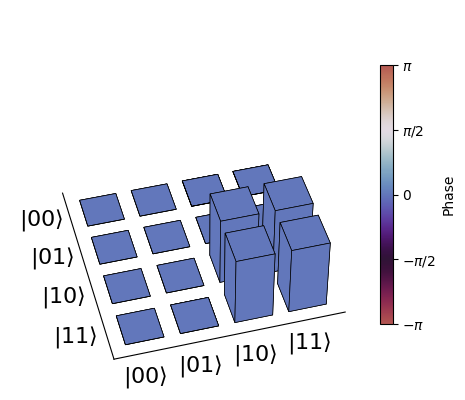

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 5.74836793e-18 -8.12941988e-18 -7.74874429e-17 -6.83717590e-17]
 [-8.12941988e-18 -8.12941988e-18 -2.91194475e-17 -3.38815514e-17]
 [-8.49590065e-17 -4.09445911e-17  4.99999998e-01  4.99999998e-01]
 [-5.24413270e-17 -4.76792230e-17  4.99999998e-01  4.99999998e-01]]

In [69]:
state_name = "DI"
rho_theory = pi_3_simulation
plot_complex_density_matrix(rho_theory)
display(rho_theory)

In [70]:
# Bruker_folders_path = r"C:\Users\lemon\OneDrive - Brown University\CNOT project\tomography\data\Br-uker_folders\2024_12_13"
data_folder = r"C:\Users\donny\Desktop\desktop_files\Brown\All_data\Final_Organized_MIT_DATA\2024_12_23-24\Deutsch_Identity_ns1_268"

Flip the frequency axis

# Calculating the frequency axis for the spectrum
All data in below cell is from Donny's email & Bruker plots

According to Bruker's software, the middle of the spectrum should be the experimental larmor frequency (with chemical shift included), and we can set this to 0 Hz. In other words, the frequency axis range is: (-spectrum_width/2, spectrum/2), with 0 in the middle, and left peak should occur at -$J$ and right peak at $J$

(14, 3, 3200)


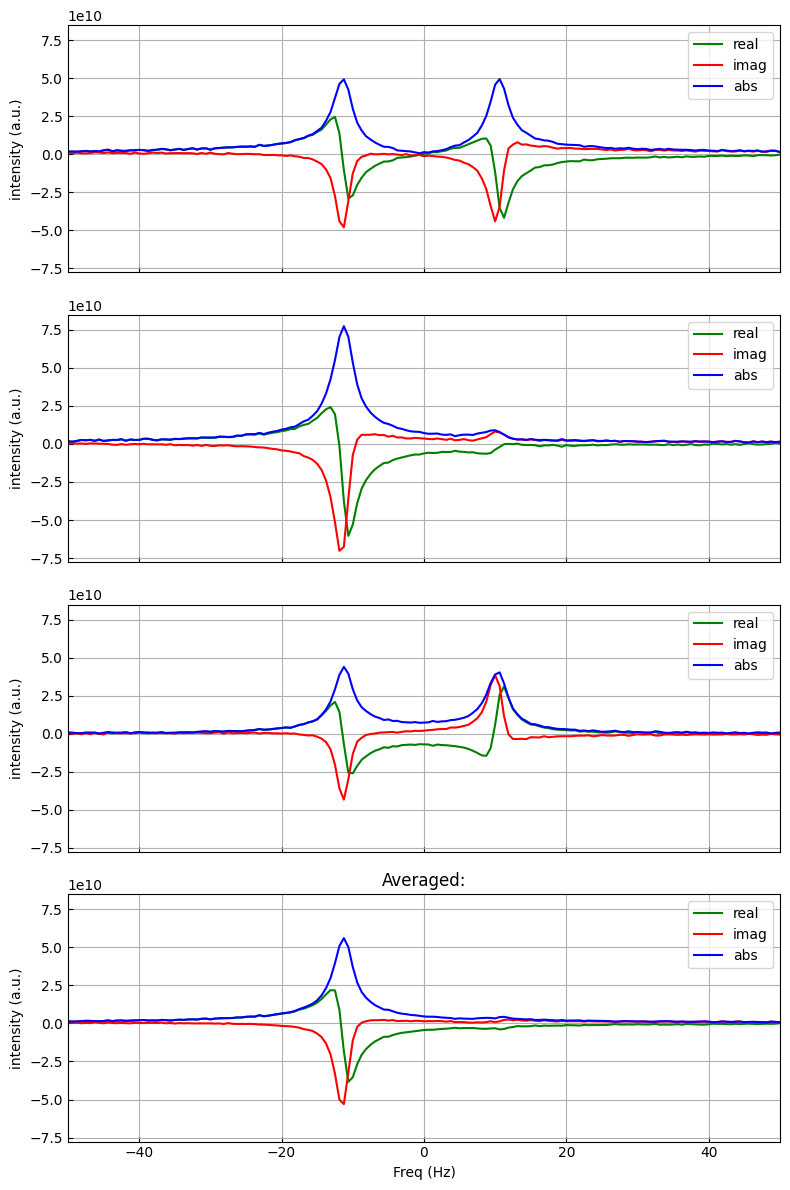

(14, 3200)


In [71]:
freqs, all_spectra_complex = temporal_average(data_folder, display_avg=True, DISPLAY_I=5, phase_0=PHASE_0)

In [72]:
freqs

array([-999.6875    , -999.06269531, -998.43789062, ...,  997.81308594,
        998.43789062,  999.06269531])

In [73]:

freqs_local = np.linspace(-SPECTRUM_WIDTH / 2, SPECTRUM_WIDTH / 2, all_spectra_complex.shape[1])

In [74]:
all_spectra = np.zeros((all_spectra_complex.shape[0] * 2, all_spectra_complex.shape[1]))

for i in range(all_spectra_complex.shape[0]):
    all_spectra[i * 2, :] = all_spectra_complex[i, :].real
    all_spectra[i * 2 + 1, :] = all_spectra_complex[i, :].imag

all_spectra.shape

(28, 3200)

# Plotting Everything Together

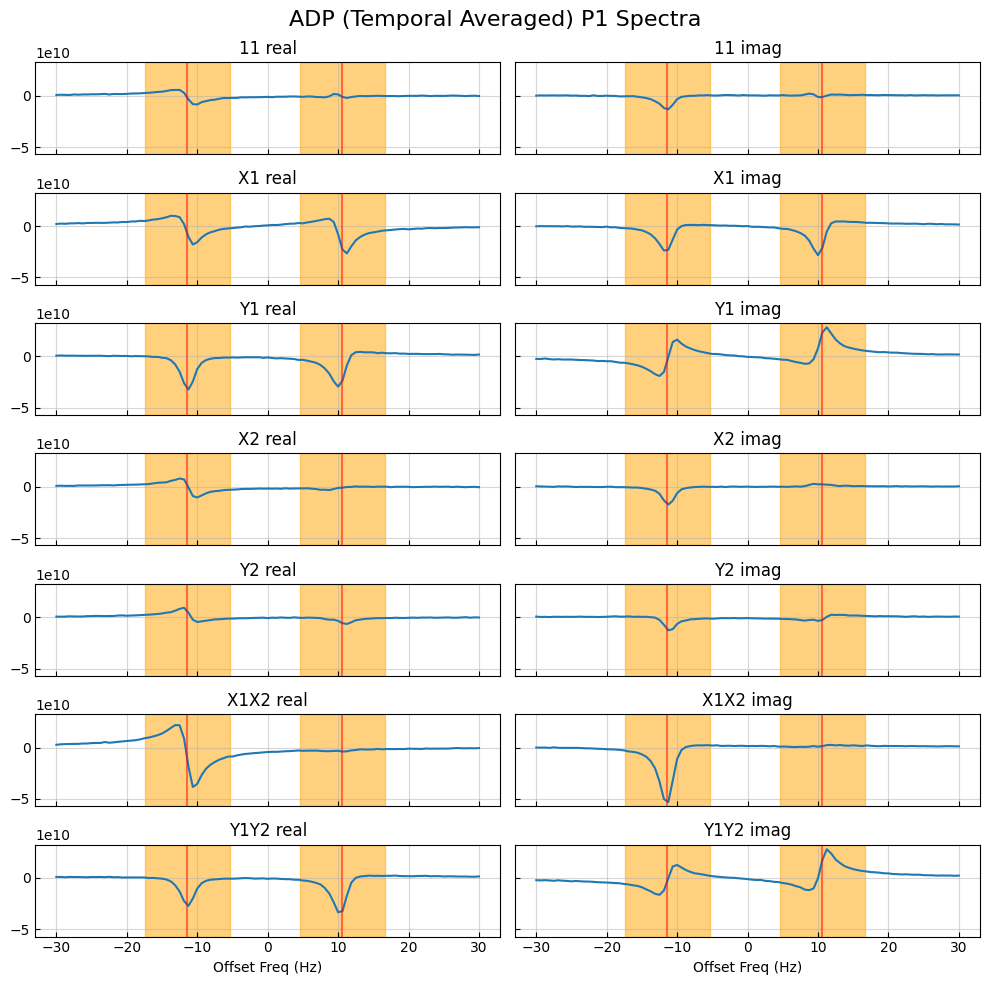

In [75]:
INT_WIDTH = 12  # in Hz. The width to integrate over.
X_LIMS_DISPLAY = [-30, 30]


# Making an offset so the red lines visually line up with the peaks
p1_offset = -0.4
p1_freqs = (L_FREQ + p1_offset, R_FREQ + p1_offset)

fig_1, axs_1 = helper.plot_spectra_together(freqs, all_spectra[:all_spectra.shape[0]//2],
                                     glob.SPECTRA_NAMES, X_LIMS_DISPLAY, p1_freqs[0], p1_freqs[1], int_width=INT_WIDTH, share_y=True)
fig_1.suptitle('ADP (Temporal Averaged) P1 Spectra', size=16)
fig_1.tight_layout()
plt.show()

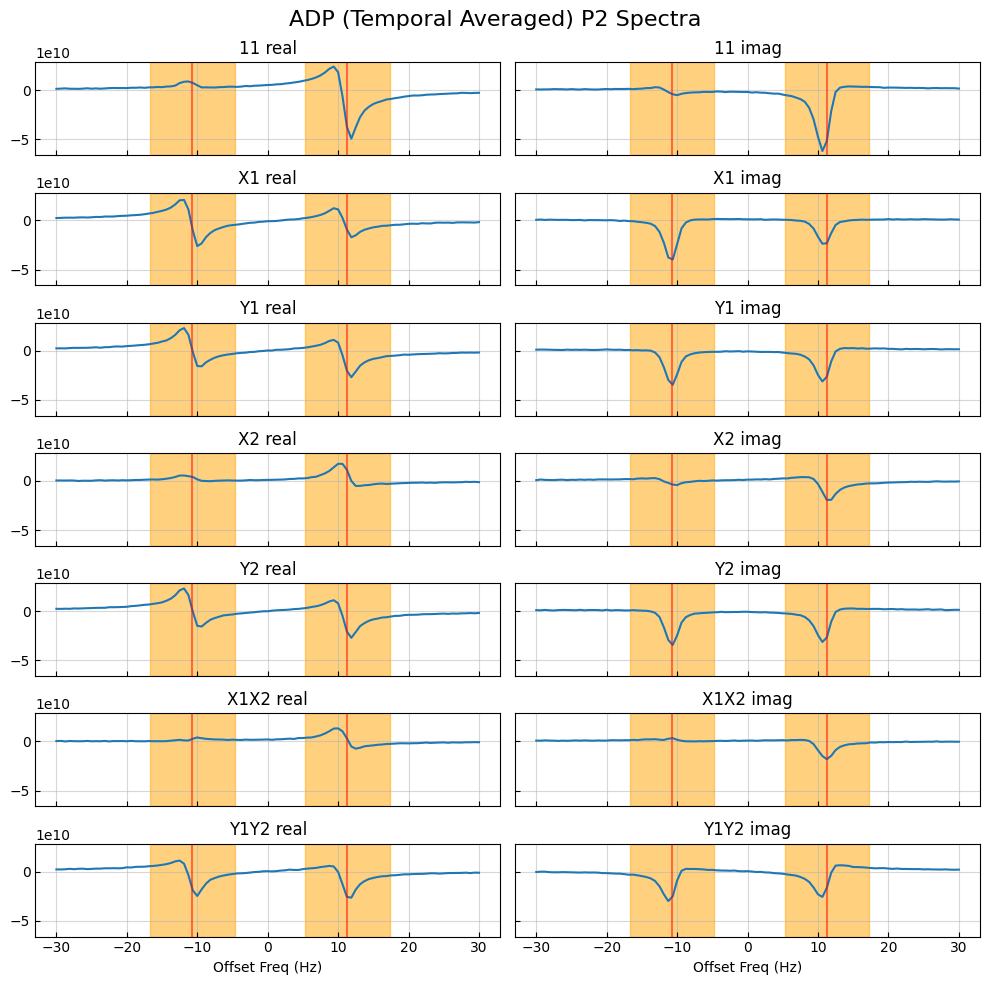

In [76]:
# Making an offset so the red lines visually line up with the peaks
p2_offset = .3
p2_freqs = (L_FREQ + p2_offset, R_FREQ + p2_offset)

fig_2, axs_2 = helper.plot_spectra_together(freqs, all_spectra[all_spectra.shape[0] // 2:], glob.SPECTRA_NAMES, X_LIMS_DISPLAY, p2_freqs[0], p2_freqs[1], int_width=INT_WIDTH, share_y=True)
fig_2.suptitle('ADP (Temporal Averaged) P2 Spectra', size=16)
fig_2.tight_layout()
plt.show()


# Preparing for Tomography Calculations:

We use convention of using the "I" to denote the first spin ($I_1$) and "S" the second spin ($I_2$)

$(I=I_1, S=I_2)$

Quick Check that our pulse sequences covers all 15 basis operators (not necessary)

In [77]:
op.check_basis_complete()

Operator basis is complete (15 elements)


# Three Methods for calculating coefficients

1. Just the height of the spectrum at the expected peak locations
2. Integration of peaks (simpson method & trapezoid method, but both seem to give almost identical answers)
3. (no longer used) Fitting a theoretical Lorentzian model to our data using scipy.curve_fit

## First approach: get height of one data point closest to theoretical peak locations

### Construct a "`coefficient groups`". 
"coefficient groups" is a list of "group"s, with each group being a list of:

`[operator, (c1, spectrum type), (c2, spectrum type), (c3, spectrum type), ...]`

where the first element of the group is a product operator,

and the following elements are tuples of: (coefficients corresponding to that operator, the type of spectrum which the coefficient came from).

In the case of ADP there are two spectrum types: P1 and P2

(each spectrum produces two coefficients)

In [78]:
coeff_groups_height = CoefficientGroups()

for (i, spectrum) in enumerate(all_spectra):
    # Height of the point closest to each peak's frequency location
    L = spectrum[np.absolute(freqs - L_FREQ).argmin()]
    R = spectrum[np.absolute(freqs - R_FREQ).argmin()]
    coeff_groups_height.add_coefficient(op.product_operators[i][0], L + R, helper.index_to_element(i))
    coeff_groups_height.add_coefficient(op.product_operators[i][1], L - R, helper.index_to_element(i))
    # print(f"Spectrum {thermal_col_names[i]} L+R is: {(L+R):.1e}, L-R is {(L-R):.1e}")

print(f'number of groups is: {len(coeff_groups_height.data)} (<- should be 15)')

number of groups is: 15 (<- should be 15)


Average the coefficients for each operator, and reconstruct the density matrix

## Second Approach: integrate the raw data
1. Integrate sample points using (`scipy.integrate.trapezoid`)
2. Integrate sample points using (`scipy.integrate.simpson`)

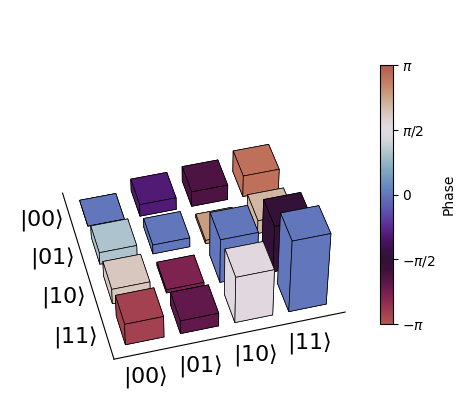

projection of naive integration: (0.4603275488264273-2.9784270601875956e-17j)


In [79]:
rho_naive = helper.integrate_simpson(freqs, all_spectra, p1_freqs, p2_freqs, INT_WIDTH, positive_diag=True)

plot_complex_density_matrix(rho_naive)
print(f"projection of naive integration: {helper.projection_fortunato(rho_naive, rho_theory)}")

### Integrating with various different parameters to find the integration with the largest projection value:

In [80]:
result_filename = f"result_{state_name}.pickle"
error_filename = f"result_{state_name}_error.pickle"
# result_filename = f"result_{state_name}.pickle"
# error_filename = f"result_{state_name}_error.pickle"

try:
    with open(result_filename, "rb") as result_file:
        best_rho_simpson, best_projection, best_offsets, best_int_width = pickle.load(result_file)
    print("Found previously saved result file!")
        
except FileNotFoundError:
    print("Couldn't find saved result. Integrating and saving the result...")
    best_rho_simpson, best_projection, best_offsets, best_int_width, rho_error = \
        helper.integrate_optimized(freqs, all_spectra, p1_freqs, p2_freqs, rho_theory, return_error=True)
                                   # p1_range=[0], p2_range=[0], width_range=[4])
    with open(result_filename, "wb") as result_file:
        pickle.dump([best_rho_simpson, best_projection, best_offsets, best_int_width], result_file)
    with open(error_filename, "wb") as error_file:
        pickle.dump(rho_error, error_file)


try:
    with open(error_filename, "rb") as error_file:
        rho_error = pickle.load(error_file)
    print("Found previously saved error file")
    
except FileNotFoundError: # in the case where result file exists but error file doesn't.
    print("Couldn't find saved error file. Calculating and saving error")
    rho_error = helper.integrate_simpson(freqs, all_spectra, p1_freqs, p2_freqs, best_int_width,
                                         best_offsets[0], best_offsets[1], return_error=True)
    with open(error_filename, "wb") as error_file:
        pickle.dump(rho_error, error_file)
    

Couldn't find saved result. Integrating and saving the result...
Found previously saved error file


Best parameters: (-2, -3), 1
Best projection: 0.8069359875006977


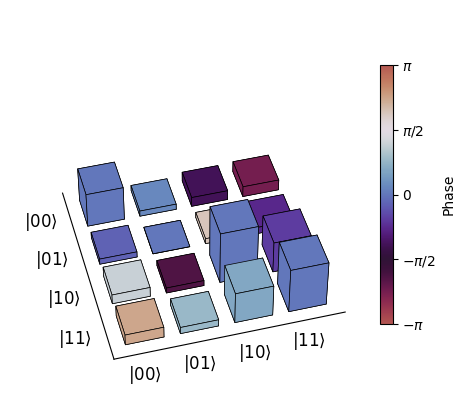

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [81]:
print(f"Best parameters: {best_offsets}, {best_int_width}")
print(f"Best projection: {best_projection}")
plot_complex_density_matrix(best_rho_simpson, label_size=12, label_qubit=True, save_to="")

In [82]:
display(best_rho_simpson)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.26058514+0.j          0.04182454+0.00892414j  0.02557748-0.06849268j
  -0.05756083-0.05785892j]
 [ 0.04182454-0.00892414j  0.        +0.j         -0.01745413+0.03754409j
   0.03536599-0.03715484j]
 [ 0.02557748+0.06849268j -0.01745413-0.03754409j  0.39851983+0.j
   0.19748691-0.13559316j]
 [-0.05756083+0.05785892j  0.03536599+0.03715484j  0.19748691+0.13559316j
   0.34089503+0.j        ]]

In [83]:
np.min(best_rho_simpson.diag())

0.0

In [84]:
best_rho_simpson - op.IDENTITY * np.min(best_rho_simpson.diag())

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.26058514+0.j          0.04182454+0.00892414j  0.02557748-0.06849268j
  -0.05756083-0.05785892j]
 [ 0.04182454-0.00892414j  0.        +0.j         -0.01745413+0.03754409j
   0.03536599-0.03715484j]
 [ 0.02557748+0.06849268j -0.01745413-0.03754409j  0.39851983+0.j
   0.19748691-0.13559316j]
 [-0.05756083+0.05785892j  0.03536599+0.03715484j  0.19748691+0.13559316j
   0.34089503+0.j        ]]

In [85]:
import importlib
importlib.reload(tomography_helper_functions)
helper = tomography_helper_functions

print(f"qutip: {qt.fidelity(rho_theory, best_rho_simpson)}")
# print(f"standard: {helper.projection_jozsa(rho_theory, best_rho_simpson)}")
# print(f"standard reversed: {helper.projection_jozsa(best_rho_simpson, rho_theory)}")
# print(qt.fidelity(best_rho_simpson, rho_theory))
print(f"Fortunato: {helper.projection_fortunato(rho_theory, best_rho_simpson)}")

qutip: 0.7531230673105584
Fortunato: (0.8069359875006977-1.974364998128661e-17j)


In [86]:
(rho_theory.sqrtm() * best_rho_simpson * rho_theory.sqrtm()).sqrtm() ** 2

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 1.49793926e-18+3.00926554e-36j  1.41772327e-18+3.27876975e-19j
  -3.83412465e-11-1.51468749e-10j -3.83412532e-11-1.51468748e-10j]
 [ 4.80476977e-19+8.33457484e-20j  9.37400082e-18-1.47973236e-17j
  -6.73515670e-11-8.82555438e-10j -6.73515987e-11-8.82555412e-10j]
 [-3.83412490e-11+1.51468749e-10j  5.08298324e-10+9.12151713e-10j
   2.83597168e-01-7.39900361e-12j  2.83597167e-01-3.58941424e-09j]
 [-3.83412508e-11+1.51468748e-10j  5.08298224e-10+9.12151809e-10j
   2.83597167e-01+3.58941421e-09j  2.83597166e-01+7.39901281e-12j]]